# GIẢI THUẬT 2: SUPPORT VECTOR MACHINE (SVM)

## Ôn tập lý thuyết

### 1. Nguyên lý hoạt động của SVM

***Support Vector Machine (SVM)*** là một thuật toán học máy **có giám sát** (supervised learning) được sử dụng chủ yếu cho bài toán **phân loại** (classification), và đôi khi cho **hồi quy** (regression). 

Mục tiêu chính của SVM là tìm ra một siêu phẳng (hyperplane) tối ưu để phân tách dữ liệu của các lớp khác nhau trong không gian đặc trưng (feature space).

SVM hoạt động dựa trên ý tưởng: *tìm ra một ranh giới phân tách sao cho khoảng cách (margin) giữa ranh giới đó và các điểm dữ liệu gần nhất của hai lớp là lớn nhất*. Việc tối đa hóa margin giúp mô hình có khả năng tổng quát hóa tốt hơn, giảm nguy cơ overfitting.

### 2. Ranh giới phân tách (Hyperplane) và Lề (Margin)

- Hyperplane (Siêu phẳng): là một đường thẳng (trong 2D), mặt phẳng (trong 3D), hoặc siêu phẳng (trong không gian nhiều chiều) dùng để phân tách dữ liệu thành các lớp. 

Công thức tổng quát của siêu phẳng là:
>   $w_1 x_1 + w_2 x_2 + \dots + w_n x_n + b = 0$

*Trong đó:*

𝑤 là vector pháp tuyến của siêu phẳng — tức là hướng vuông góc với siêu phẳng đó.

𝑏 là hệ số dịch (bias), biểu thị khoảng cách từ siêu phẳng đến gốc tọa độ theo hướng của vector pháp tuyến 
𝑤

- Margin (Lề): là khoảng cách từ siêu phẳng phân tách đến các điểm dữ liệu gần nhất của mỗi lớp. SVM cố gắng tối đa hóa margin này để tăng khả năng tổng quát hóa của mô hình.

### 3. Các Vector hỗ trợ (Support Vectors)

Các vector hỗ trợ là những điểm dữ liệu gần siêu phẳng nhất, đóng vai trò quan trọng trong việc xác định vị trí của siêu phẳng và độ rộng của biên (margin) trong SVM. Nếu loại bỏ các điểm này, ranh giới phân tách có thể thay đổi đáng kể.

Support vectors giúp SVM đạt hiệu quả cao vì chỉ một số ít điểm dữ liệu (những điểm nằm trên biên) ảnh hưởng đến mô hình, làm cho mô hình ổn định và tránh overfitting.

### 4. Phân biệt SVM với lề cứng (Hard Margin) và lề mềm (Soft Margin)

Trong thực tế, không phải lúc nào dữ liệu cũng có thể tách biệt hoàn toàn bằng một siêu phẳng. Vì vậy, SVM có hai dạng chính:

- *Hard Margin:* áp dụng khi dữ liệu hoàn toàn có thể phân tách tuyến tính, không có nhiễu hoặc điểm ngoại lai (outlier). Mô hình cố gắng tìm một siêu phẳng phân tách tất cả điểm mà không cho phép sai số.

- *Soft Margin:* cho phép một số điểm dữ liệu bị phân loại sai (hoặc nằm sai vùng phân tách). Điều này giúp mô hình linh hoạt hơn, đặc biệt khi dữ liệu có nhiễu hoặc các lớp chồng lấn nhau.

Khi dữ liệu có nhiễu hoặc không thể tách tuyến tính, nên sử dụng lề mềm (soft margin) để đạt hiệu suất tổng quát hóa tốt hơn.

### 5. Hàm nhân (Kernel) trong SVM

Hàm nhân (kernel function) là một kỹ thuật cho phép SVM xử lý các bài toán phi tuyến bằng cách ánh xạ dữ liệu sang một không gian có chiều cao hơn, nơi dữ liệu có thể được phân tách tuyến tính.

Một số loại kernel phổ biến:

- *Linear Kernel:* $K(x, y) = x \cdot y$ — dùng khi dữ liệu có thể tách tuyến tính.

- *Polynomial Kernel:* $K(x, y) = (x \cdot y + 1)^d$ — thích hợp khi ranh giới phân tách có dạng cong hoặc có tương tác giữa các đặc trưng.

- *RBF (Radial Basis Function / Gaussian Kernel):* $K(x, y) = e^{-\gamma \lVert x - y \rVert^2}$ — phù hợp khi dữ liệu phức tạp, phi tuyến; đây là kernel phổ biến nhất trong thực tế.

Việc lựa chọn kernel phù hợp phụ thuộc vào bản chất dữ liệu.
| Kernel | Khi nên dùng | Ghi chú |
|---------|---------------|---------|
| **Linear** | Dữ liệu gần tuyến tính, số chiều lớn | Nhanh, ít tham số |
| **RBF** | Dữ liệu phi tuyến, không rõ cấu trúc | Phổ biến nhất |
| **Polynomial** | Có tương tác bậc thấp giữa đặc trưng | Dễ overfit khi bậc cao |

### 6. Tham số C trong SVM

Tham số C là hệ số phạt (penalty parameter) trong SVM, kiểm soát sự đánh đổi giữa việc tối đa hóa margin và giảm lỗi phân loại trên tập huấn luyện.

- Nếu C *lớn:* mô hình cố gắng phân loại chính xác tất cả điểm dữ liệu, dẫn đến margin nhỏ và có nguy cơ overfitting.

- Nếu C *nhỏ:* mô hình cho phép một số lỗi phân loại, margin lớn hơn, giúp mô hình tổng quát hóa tốt hơn và dễ underfitting

Cách chọn tham số C trong SVM

*Dùng Cross-Validation (Xác thực chéo)*

- Chia dữ liệu thành nhiều phần (folds).
- Thử nhiều giá trị C
- C khác nhau (ví dụ: 0.01, 0.1, 1, 10, 100).
- Với mỗi giá trị C,  huấn luyện và đánh giá mô hình trên các fold.
- Tính độ chính xác trung bình (average accuracy) cho từng giá trị C.
- Chọn giá trị C có độ chính xác trung bình cao nhất.

*Dùng Grid Search (Tìm kiếm theo lưới)*
- Tự động duyệt qua toàn bộ danh sách các giá trị C mà bạn cung cấp.
- Mỗi giá trị C sẽ được đánh giá bằng Cross-Validation.
- Cuối cùng, chọn ra giá trị C cho hiệu suất trung bình cao nhất.

### 7. Quy trình xây dựng mô hình SVM bằng Scikit-learn

Quy trình cơ bản khi xây dựng mô hình SVM gồm các bước sau:
1. Chuẩn bị dữ liệu và tách tập train/test.
2. Chuẩn hóa dữ liệu bằng StandardScaler (do SVM nhạy cảm với tỷ lệ giữa các đặc trưng).
3. Khởi tạo mô hình SVM với kernel phù hợp.
4. Huấn luyện mô hình bằng hàm fit().
5. Dự đoán kết quả và đánh giá mô hình.

#### Ví dụ minh họa mô hình SVM với Linear Kernel

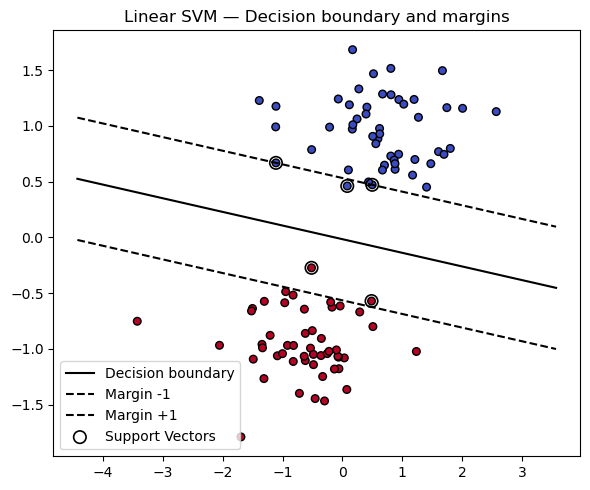

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# 1. Tạo dữ liệu 2D có thể tách tuyến tính
X, y = make_blobs(n_samples=100, centers=2, random_state=6, cluster_std=1.0)

# 2. Chuẩn hóa dữ liệu (SVM rất nhạy với tỷ lệ đặc trưng)
scaler = StandardScaler()
X_s = scaler.fit_transform(X)

# 3. Huấn luyện mô hình SVM tuyến tính
model = SVC(kernel='linear', C=1.0)  # C nhỏ = soft margin, C lớn = hard margin
model.fit(X_s, y)

# 4. Lấy trọng số w và bias b
w = model.coef_[0]
b = model.intercept_[0]

# 5. Tính đường biên quyết định
x_min, x_max = X_s[:, 0].min() - 1, X_s[:, 0].max() + 1
xx = np.linspace(x_min, x_max)

# Biên chính: w·x + b = 0  =>  x2 = -(w1*x1 + b)/w2
yy = -(w[0] * xx + b) / w[1]

# Hai biên margin: w·x + b = ±1
margin = 1 / np.sqrt(np.sum(w ** 2))
yy_down = yy - np.sqrt(1 + (w[0] / w[1]) ** 2) * margin
yy_up = yy + np.sqrt(1 + (w[0] / w[1]) ** 2) * margin

# 6. Vẽ hình
plt.figure(figsize=(6, 5))
plt.scatter(X_s[:, 0], X_s[:, 1], c=y, cmap='coolwarm', s=30, edgecolors='k')
plt.plot(xx, yy, 'k-', label='Decision boundary')
plt.plot(xx, yy_down, 'k--', label='Margin -1')
plt.plot(xx, yy_up, 'k--', label='Margin +1')

# Vẽ support vectors (những điểm nằm trên biên)
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=80, facecolors='none', edgecolors='k', linewidths=1.2, label='Support Vectors')

plt.title("Linear SVM — Decision boundary and margins")
plt.legend()
plt.tight_layout()
plt.show()


- Đường nét liền đen → là siêu phẳng phân tách (decision boundary).

- Hai đường nét đứt → là biên lề (margin).

- Các điểm viền đen → là support vectors.

- Khi bạn thay đổi C:

C=1000: hard margin, ép phân tách hoàn toàn → dễ overfit.

C=0.1: soft margin, cho phép sai số nhỏ → tổng quát hóa tốt hơn.

#### Ví dụ minh họa mô hình SVM với RBF Kernel

Train acc: 0.9911111111111112
Test  acc: 0.9866666666666667


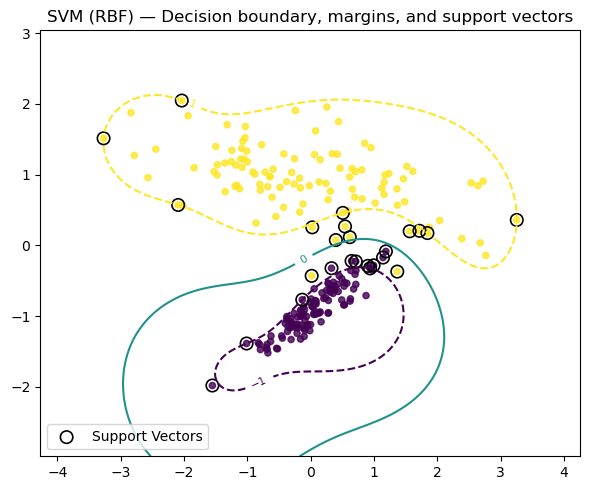

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# 1) Tạo dữ liệu 2D
X, y = make_classification(
    n_samples=300, n_features=2, n_redundant=0, n_informative=2,
    n_clusters_per_class=1, class_sep=1.5, random_state=42
)

# 2) Chia train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 3) Chuẩn hóa (rất quan trọng với SVM)
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

# 4) Huấn luyện SVM với RBF kernel
clf = SVC(kernel='rbf', C=1.0, gamma='scale')
clf.fit(X_train_s, y_train)
print("Train acc:", clf.score(X_train_s, y_train))
print("Test  acc:", clf.score(X_test_s, y_test))

# 5) Vẽ siêu phẳng quyết định và các đường margin
h = 0.02
x_min, x_max = X_train_s[:, 0].min() - 1, X_train_s[:, 0].max() + 1
y_min, y_max = X_train_s[:, 1].min() - 1, X_train_s[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(6, 5))
# Các contour ở mức -1, 0, 1: biên margin và hyperplane
cs = plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--','-','--'])
plt.clabel(cs, inline=True, fontsize=8)

# Điểm train
plt.scatter(X_train_s[:, 0], X_train_s[:, 1], c=y_train, s=20, alpha=0.8)

# Support vectors viền đen
sv = clf.support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], s=80, facecolors='none', edgecolors='k', linewidths=1.2, label='Support Vectors')

plt.title("SVM (RBF) — Decision boundary, margins, and support vectors")
plt.legend(loc="lower left")
plt.tight_layout()
plt.show()

- Đường nét liền (mức 0): là biên quyết định (decision boundary).

- Hai đường nét đứt (mức ±1): là biên lề (margin) mà SVM cố gắng tối đa hóa.

- Các điểm viền đen: là support vectors – những điểm nằm sát biên, quyết định vị trí đường phân chia.

Vì dùng RBF kernel, biên cong uốn theo hình dạng dữ liệu phi tuyến, giúp mô hình phân loại chính xác hơn khi dữ liệu không thể tách bằng đường thẳng.

### 8. Chuẩn hóa dữ liệu (Scaling)

Chuẩn hóa dữ liệu (Scaling) trong SVM là bước đưa các đặc trưng (features) về cùng một thang đo, thường trong khoảng [0,1] hoặc [−1,1], trước khi huấn luyện mô hình SVM.

SVM dựa trên khoảng cách giữa các điểm dữ liệu và siêu phẳng (ví dụ: 𝑤⋅𝑥 + 𝑏 = 0), nên nếu các đặc trưng có đơn vị hoặc thang đo khác nhau, biến có giá trị lớn hơn sẽ chi phối hướng của siêu phẳng.

Việc chuẩn hóa giúp đưa các đặc trưng về cùng một thang đo (scale), tránh việc đặc trưng có giá trị lớn lấn át đặc trưng có giá trị nhỏ.

Giúp các kernel như RBF, Polynomial hoạt động hiệu quả hơn, vì chúng phụ thuộc vào khoảng cách Euclidean giữa các điểm và tăng tốc độ hội tụ khi huấn luyện mô hình.

#### Min–Max Scaling

Công thức:

$$
x' = \frac{x - x_{\min}}{x_{\max} - x_{\min}}
$$

**Giải thích:**
- Đưa giá trị của đặc trưng về khoảng [0, 1].
- Phù hợp khi dữ liệu có giới hạn rõ ràng (phần trăm, tỷ lệ,...).
- Tuy nhiên, nhạy cảm với outlier, vì giá trị cực trị làm thay đổi toàn bộ khoảng.

#### Standardization (Z-score Scaling)
*(được triển khai trong sklearn bằng hàm `StandardScaler()`)*

Công thức:

$$
x' = \frac{x - \mu}{\sigma}
$$

Trong đó:  
- $\mu$: giá trị trung bình của đặc trưng  
- $\sigma$: độ lệch chuẩn của đặc trưng  

Sau khi chuẩn hóa:

$$
\text{mean}(x') = 0, \quad \text{std}(x') = 1
$$

**Giải thích:**
- Giúp dữ liệu có phân phối chuẩn (mean=0, std=1).  
- Loại bỏ ảnh hưởng của thang đo và đơn vị.  
- Rất phù hợp với SVM, đặc biệt khi sử dụng RBF kernel.

**Tóm lại:**  
- `MinMaxScaler()` → thực hiện *Min–Max Scaling*  
- `StandardScaler()` → thực hiện *Z-score Scaling (Standardization)*  
→ Cả hai đều là **phương pháp chuẩn hóa dữ liệu phổ biến**, nhưng **`StandardScaler()` là lựa chọn tối ưu cho SVM**.